### Importing the dependencies

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

### Data preprocessing

In [50]:
# loading the dataset
loan_dataset = pd.read_csv('/content/dataset.csv')

In [51]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [52]:
# printing the first five rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
# number of rows and column
loan_dataset.shape

(614, 13)

In [54]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
#number of missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
# Imputing missing values using VIM library in R
# Importing the new dataset
loan_dataset = pd.read_csv('/content/datasetk3.csv')

In [57]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [58]:
# dropping missing values in married column
loan_dataset = loan_dataset.dropna()

In [59]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
#label encoding
loan_dataset.replace({"Loan_Status": {"N":0,"Y":1}}, inplace = True)

In [61]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,141,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [62]:
# dependent column values
loan_dataset["Dependents"].value_counts()

0     355
2     103
1     102
3+     51
Name: Dependents, dtype: int64

In [63]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [64]:
loan_dataset["Dependents"].value_counts()

0    355
2    103
1    102
4     51
Name: Dependents, dtype: int64

## Data Visualization

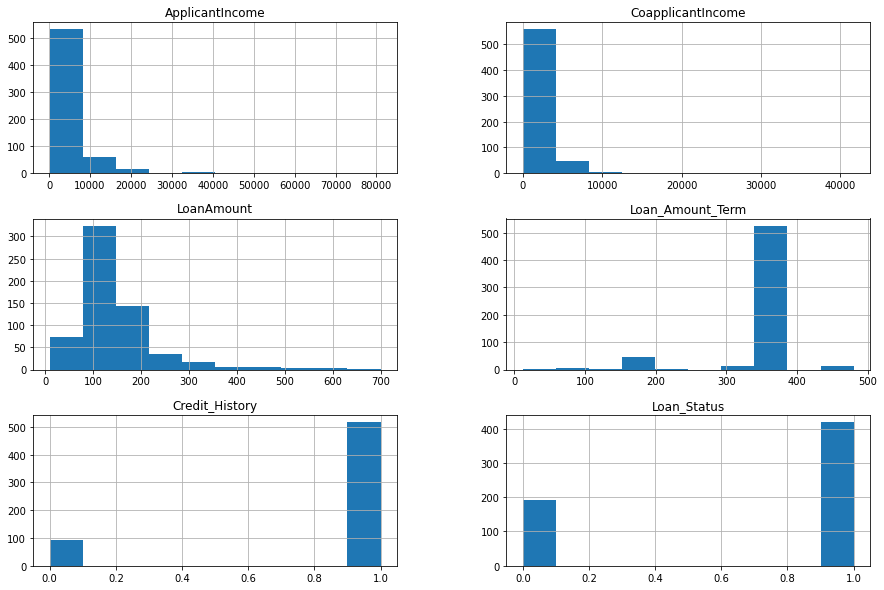

In [65]:
# Overview
loan_dataset.hist(figsize=(15, 10))
plt.show()

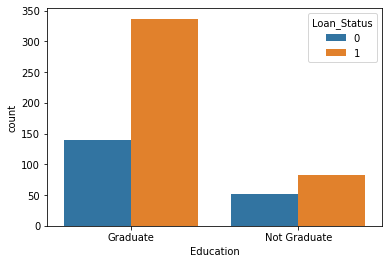

In [66]:
# education and loan status
sns.countplot(x='Education', hue = 'Loan_Status', data=loan_dataset)

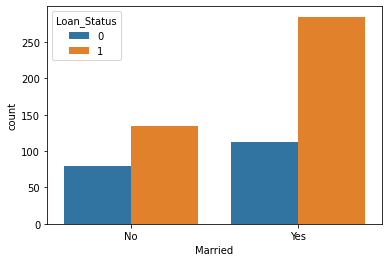

In [67]:
# marital status & Loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data=loan_dataset)

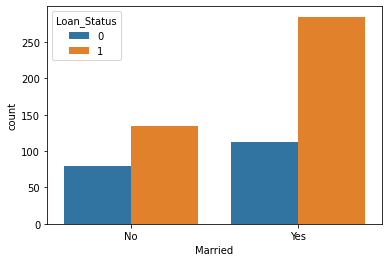

In [68]:
# marital status & Loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data=loan_dataset)

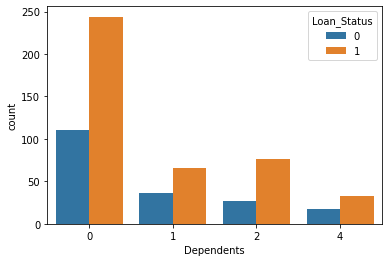

In [69]:
# marital status & Loan status
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data=loan_dataset)

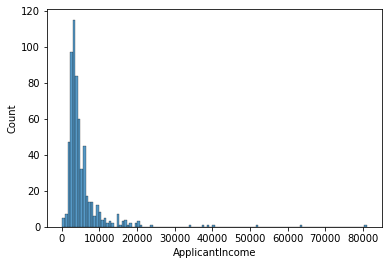

In [73]:
# Applicant Income
sns.histplot(x = 'ApplicantIncome', data= loan_dataset)

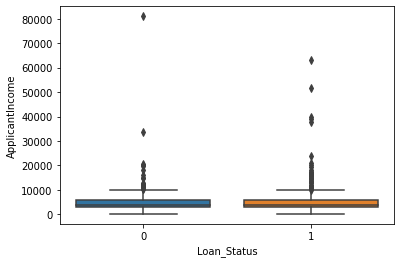

In [70]:
# Applicant Income & Loan status
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_dataset)

In [76]:
iqr = loan_dataset.ApplicantIncome.quantile(0.75) - loan_dataset.ApplicantIncome.quantile(0.25)
print("IQR:",iqr)
ub = loan_dataset.ApplicantIncome.quantile(0.75) + 1.5*iqr
lb = loan_dataset.ApplicantIncome.quantile(0.25) - 1.5*iqr

print("upper bound:",ub)
print("lower bound:",lb)

IQR: 2914.5
upper bound: 10161.75
lower bound: -1496.25


In [72]:
below_lb = np.sum(loan_dataset['ApplicantIncome']<lb)
print("No. of outliers below lower bound:",below_lb)
above_ub = np.sum(loan_dataset['ApplicantIncome']>ub)
print("No. of outliers above upper bound:",above_ub)
total_outliers = above_ub + below_lb
print("Total no. of outliers:",total_outliers)

No. of outliers below lower bound: 0
No. of outliers above upper bound: 50
Total no. of outliers: 50


* So we can conclude that most of the Applicants in our dataset are spread around mean and the variable Applicant Income is right skewed.

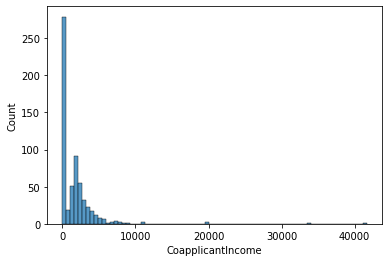

In [74]:
# CoApplicant Income
sns.histplot(x = 'CoapplicantIncome', data= loan_dataset)

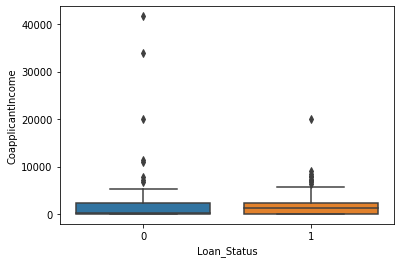

In [75]:
# Coapplicant Income & Loan status
sns.boxplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = loan_dataset)

In [77]:
iqr = loan_dataset.CoapplicantIncome.quantile(0.75) - loan_dataset.CoapplicantIncome.quantile(0.25)
print("IQR:",iqr)
ub = loan_dataset.CoapplicantIncome.quantile(0.75) + 1.5*iqr
lb = loan_dataset.CoapplicantIncome.quantile(0.25) - 1.5*iqr

print("upper bound:",ub)
print("lower bound:",lb)

IQR: 2304.0
upper bound: 5760.0
lower bound: -3456.0


In [78]:
below_lb = np.sum(loan_dataset['CoapplicantIncome']<lb)
print("No. of outliers below lower bound:",below_lb)
above_ub = np.sum(loan_dataset['CoapplicantIncome']>ub)
print("No. of outliers above upper bound:",above_ub)
total_outliers = above_ub + below_lb
print("Total no. of outliers:",total_outliers)

No. of outliers below lower bound: 0
No. of outliers above upper bound: 18
Total no. of outliers: 18


* So we can conclude that most of the Capplicants in our dataset are spread around mean and the variable Coapplicant Income is right skewed.

count    611.000000
mean     145.927987
std       84.862307
min        9.000000
25%      100.000000
50%      128.000000
75%      166.500000
max      700.000000
Name: LoanAmount, dtype: float64

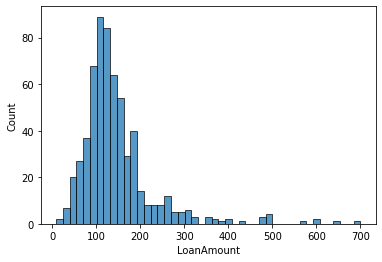

In [82]:
# Loan Amount
sns.histplot(x = 'LoanAmount', data= loan_dataset)
loan_dataset['LoanAmount'].describe()

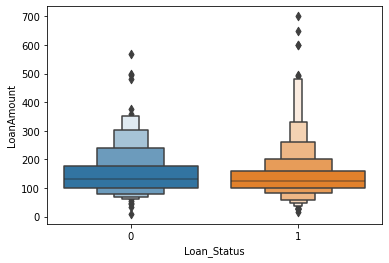

In [80]:
# Loan Amount & Loan status
sns.boxenplot(x = 'Loan_Status', y = 'LoanAmount', data = loan_dataset)

* Most of the Loan Amount 100 to 166.

## Converting categorical to numerical variables

In [23]:
# convert categorical variables to numerical values
loan_dataset.replace({"Married": {"No":0,"Yes":1}, "Gender":{'Male':1,'Female':0}, 
                      'Self_Employed': {'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education': {'Graduate':1,'Not Graduate':0}}, inplace = True)

In [24]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,141,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141,360,1,2,1


In [25]:
# seperating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [26]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
0         1        0  ...              1              2
1         1        1  ...              1              0
2         1        1  ...              1              2
3         1        1  ...              1              2
4         1        0  ...              1              2
..      ...      ...  ...            ...            ...
609       0        0  ...              1              0
610       1        1  ...              1              0
611       1        1  ...              1              2
612       1        1  ...              1              2
613       0        0  ...              0              1

[611 rows x 11 columns]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 611, dtype: int64


## Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, 
                                                    stratify = Y, random_state = 22)

In [28]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(611, 11) (488, 11) (123, 11) (488,) (123,)


## Training the model
#### SVM Model

In [87]:
classifier = svm.SVC(kernel = 'linear')

In [88]:
#training the support vector Machine model
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Model evaluation

In [89]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [90]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.8155737704918032


In [91]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [92]:
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.8373983739837398


### Random forest Classifier

In [40]:
model = RandomForestClassifier(n_estimators = 100, random_state = 22)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('F1 Score of the model: ', f1_score(Y_test, y_pred))

F1 Score of the model:  0.8777777777777778


In [39]:
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.8211382113821138


### Logistic Regression

In [43]:
logisticRegr = LogisticRegression()

In [44]:
#training the support vector Machine model
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predictions = logisticRegr.predict(X_test)

In [47]:
print('F1 Score of the model: ', f1_score(Y_test, predictions))

F1 Score of the model:  0.8852459016393442


In [48]:
test_data_accuracy = accuracy_score(predictions, Y_test)
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.8292682926829268


## Summary 
* We know that SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.

* So here we have structured data and thats why SVM gives us less accuracy and Logistic regression succeeds in giving us more accurate results.